In [16]:
from sklearn.cluster import KMeans
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv('csv/Titanic-Dataset.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df = df.drop(columns=["Cabin", "Ticket"])

In [24]:
df["Age"].fillna(df["Age"].median())
df.dropna(inplace=True)

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2


In [26]:
label_cols = ["Sex", "Embarked"]

In [27]:
le = LabelEncoder()

In [28]:
for col in label_cols:
    df[col]= le.fit_transform(df[col])

In [43]:
model = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42) 

In [44]:
X = df[["Sex", "Age", "Pclass", "Fare"]]

In [45]:
df['cluster'] = model.fit_predict(X)

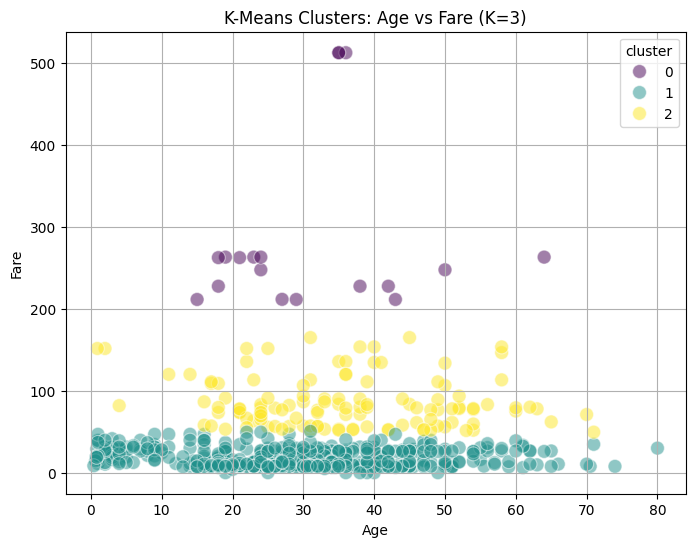

In [46]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Fare', hue='cluster', palette='viridis', data=df, s=100, alpha=0.5)
plt.title(f'K-Means Clusters: Age vs Fare (K=3)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

In [ ]:
//ELBOW method